# Краевая задача для ОДУ второго порядка

Численное решение краевой задачи для обыкновенного дифференциального уравнения второго порядка.
$$\frac{d^2u}{dx^2} + p(x)\frac{du}{dx} - q(x)u=f(x)$$
$$u(1) = 1, u(3) = 0$$

In [1]:
def p(x): return 1 + np.power(x, 2)
def q(x): return 0.5 * x
def f(x): return x + 1
a, b = 1, 3

$$u'' + (1 + x^2)u' - 0.5xu - x - 1 = 0$$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### 1. Найти приближенное решение задачи, используя разностную схему первого или второго порядка точности с погрешностью не более $10^{-3}$ (оценивая погрешность по методу Рунге).В зависимости от номера варианта использовать:

1). разностную схему с левой разностной производной первого порядка

2). разностную схему с правой разностной производной первого порядка

3). разностную схему с центральной разностной производной первого порядка

### Поиск значений $u$ с помощью метода прогонки

In [3]:
n = 500
h = (b - a)/n
x = 1
def ai(x): return 1 - p(x) * h
def ci(x): return 2 - p(x) * h + q(x) * np.power(h, 2)
def gi(x): return - f(x)

In [4]:
alpha = np.array([0])
beta = np.array([1])
for i in range(500):
    x += h
    alpha = np.append(alpha, 1/(ci(x) - ai(x) * alpha[i]))
    beta = np.append(beta, 
                     (np.power(h, 2) * gi(x) + ai(x) * beta[i])/ \
                     (ci(x) - ai(x) * alpha[i]))

In [5]:
y1 = np.zeros(n + 1)
y1[0], y1[n] = 1, 0
for i in range(n - 1, 0, -1):
    y1[i] = alpha[i + 1] * y1[i + 1] + beta[i + 1]

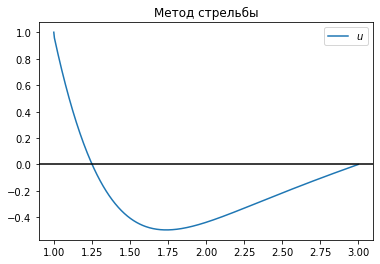

In [6]:
plt.plot(np.linspace(a, b, 501), y1, label = r"$u$")
plt.axhline(y=0, color='black')
plt.title('Метод стрельбы')
plt.legend()

### Поиск значений $u$ с помощью метода конечных разностей

После создания сетки с n-узлами подставляем разностные схемы в исходное уравнение и решаем СЛУ для каждой тройки узлов:

$$u(x_i) \approx y_{i}$$
$$u(x_i)' \approx \frac{y_i - y_{i - 1}}{h}$$ - разностная схема с левой пр-й I-го порядка
$$u(x_i)'' \approx \frac{y_{i + 1} - 2y_i + y_{i-1}}{h^2}$$

Отсюда выражаем коэффициенты при $y_i$ $-$ $C_{*, i}$, подставив разностные схемы в исходное уравнение:

$$\begin{equation*}
 \begin{cases}
   y_{i - 1}: \frac{1}{h^2} - \frac{p(x_{i})}{h}
   \\
   y_i: -\frac{2}{h^2} + \frac{p(x_{i})}{h}
   \\
   y_{i+1}: \frac{1}{h^2}
 \end{cases}
\end{equation*}$$

Таким образом получаем систему из $n + 2$ уравнения, включая краевые условия:

$$\begin{equation*}
 \begin{cases}
   y_1 C_{1, 1} + y_2 C_{1, 2} + y_3 C_{1, 3} = f(x_1)
   \\
   y_2 C_{2, 2} + y_3 C_{2, 3} + y_4 C_{2, 4} = f(x_2)
   \\
   y_3 C_{3, 3} + y_4 C_{3, 4} + y_5 C_{3, 5} = f(x_3)
   \\
   ...
   \\
   y_{n-2} C_{n-1, n-2} + y_{n-1} C_{n, n - 1} + y_{n} C_{n, n} = f(x_{n-1})
   \\
   u''(x_0) + p(1)u' = f(1) + q(1)
   \\
   u''(x_n) + p(3)u' = f(3)
 \end{cases}
\end{equation*}$$

In [7]:
def diff_schem(n = 500):
    M = np.matrix(np.zeros((n + 2) * (n + 2))).reshape(n + 2, n + 2)
    x = 1
    h = (b - a)/n
    for i in range(0, n):
        M[i, i] = (1 - h * p(x))/np.power(h, 2)
        M[i, i + 1] = (-2/np.power(h, 2) + p(x)/h - q(x))
        M[i, i + 2] = 1/np.power(h, 2)
        x += h
    B = np.array([f(1 + h*i) for i in range(n + 2)]).T
    M[n, 0] = 1/np.power(h, 2) - p(1)/h
    M[n, 1] = (h * p(1) - 2)/np.power(h, 2)
    M[n, 2] = 1/np.power(h, 2)
    M[n + 1, n - 1], M[n + 1, n], M[n + 1, n + 1] = 1/np.power(h, 2) - p(3)/h, (h * p(3) - 2)/np.power(h, 2), 1/np.power(h, 2)
    B[n] = f(1) + q(1)
    B[n + 1] = f(3)
    sol = np.linalg.solve(M, B)
    return sol[1:n + 1]

Text(0.5, 1.0, 'Метод конечных разностей')

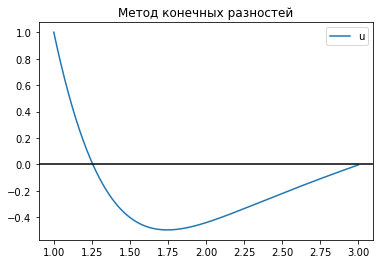

In [8]:
plt.plot(np.linspace(a, b, 500), diff_schem(500), label = 'u')
plt.axhline(y=0, color='black')
plt.legend()
plt.title('Метод конечных разностей')

### Оценка погрешности по методу Рунге

In [9]:
k = [250, 500, 1000, 2000, 4000, 8000]
rk = []
for i in k:
    rk.append(np.abs(diff_schem(i) - diff_schem(i*2)[1::2])/3)

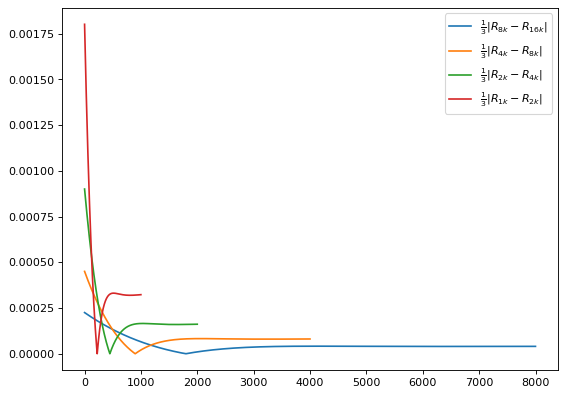

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(rk[-1], label = r'$\frac{1}{3}|R_{8k} - R_{16k}|$')
plt.plot(rk[-2], label = r'$\frac{1}{3}|R_{4k} - R_{8k}|$')
plt.plot(rk[-3], label = r'$\frac{1}{3}|R_{2k} - R_{4k}|$')
plt.plot(rk[-4], label = r'$\frac{1}{3}|R_{1k} - R_{2k}|$')
plt.legend()

Для погрешности < $10^{-3}$ имеет смысл использовать метод конечных разностей с 4000 узлами и более.